https://youtu.be/2FeWGgnyLSw
## ML lab 05: TensorFlow로 Logistic Classification의 구현하기 (new)

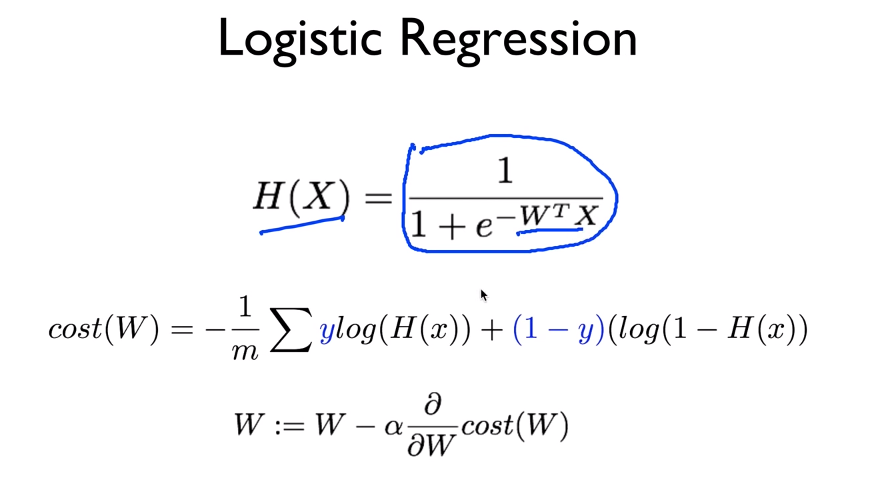

In [2]:
import tensorflow as tf
import numpy as np

x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1], [1], [1]], dtype=np.float32)

# Weight and bias
# Dimension of Weight
# number of rows of weight got to be same as number of columns of X
# number of columns of weight got to be same as number of columns of Y
# Dimension of Bias
# Same as Y
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

learning_rate = 0.001


# Hypothesis
def hypothesis(x):
    return tf.sigmoid(tf.matmul(x, W) + b)


print("Before training")
# Before training
test_x = np.array([[1, 2]], dtype=np.float32)
temp = tf.sigmoid(tf.matmul(test_x, W)) + b

if temp > 0.5:
    print("pass")
else:
    print("fail")

n_epochs = 2000
for i in range(n_epochs):
    with tf.GradientTape() as tape:
        # Cost
        cost = tf.reduce_mean(
            y_data * tf.math.log(hypothesis(x_data))
            + (1 - y_data) * tf.math.log(1 - hypothesis(x_data)))

    # Gradient
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("After training")
# After training
test_x = np.array([[1, 2]], dtype=np.float32)
temp = tf.sigmoid(tf.matmul(test_x, W)) + b

if temp > 0.5:
    print("pass")
else:
    print("fail")



Before training
pass
After training
fail


In [38]:
# import tensorflow as tf 
# tf.compat.v1.disable_eager_execution()

# x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
# y_data = [[0], [0], [0], [1], [1], [1]]

# X = tf.Variable(tf.compat.v1.random_normal([2, 1]), name='weight')
# b = tf.Variable(tf.compat.v1.random_normal([1]), name='bias')

# Hypothesis using sigmoid : tf.div(1., 1. + tf.exp(tf.matumul(X, W)))
# hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/ loss function 
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 -Y) * tf.log(1-hypothesis))
# train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate =0.01).minimize(cost)


In [30]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

''' 
better result with loss function == 'binary_crossentropy', try 'mse' for yourself
adding accuracy metric to get accuracy report during training
'''
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=5000)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


ValueError: Error when checking input: expected dense_input to have shape (2,) but got array with shape (1,)